# PyOCR Evaluation

## Import some libraries...

In [1]:
# import general libraries
import pandas as pd
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import cv2
import string
import time

In [2]:
# import libraries for connecting to S3
import boto3 
import botocore 
from sagemaker import get_execution_role 

In [3]:
# import libraries for PyOCR
from PIL import Image
import pyocr
import pyocr.builders

## Connect to S3 and read 6k eval data...

In [4]:
# connect to data in S3 
role = get_execution_role() 
bucket = 'sagemaker-060720' 
data_key = 'evalOFFdata.csv' 
data_location = 's3://{}/{}'.format(bucket, data_key) 

In [5]:
# load 6k eval data
data = pd.read_csv(data_location)

data.shape

(6576, 5)

In [6]:
start_time = time.time()

## Preprocess for OCR...

In [7]:
# PIL image objects 
images = []

# np arrays with RGB
imgs = []

for image_url in data.image_ingredients_url[0:10]:
    img = io.imread(image_url)
    imgs.append(img)
    image = Image.fromarray(img)
    images.append(image)

## Run OCR and show images...

In [8]:
# initialize tools
tools = pyocr.get_available_tools()
tool = tools[0]

# initialize language
langs = tool.get_available_languages()
lang = "eng"

----------0----------
_____ Original _____


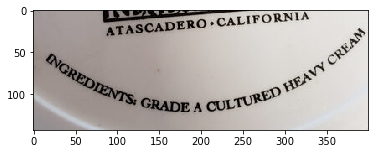

_______ Text _______
[' ', 'ATASCADERO*', 'CALIFORNIA', 'en', 'i', ' ']
____ Recognized ____


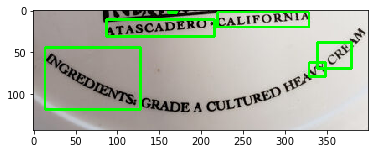

----------1----------
_____ Original _____


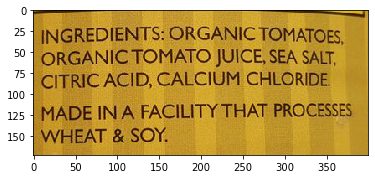

_______ Text _______
[' ']
____ Recognized ____


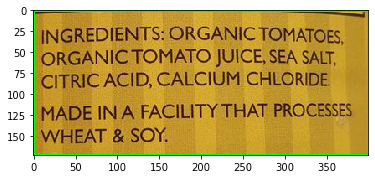

----------2----------
_____ Original _____


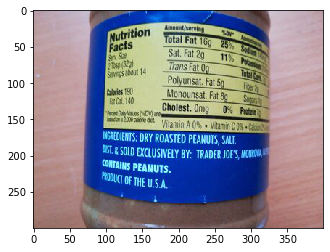

_______ Text _______
[' ']
____ Recognized ____


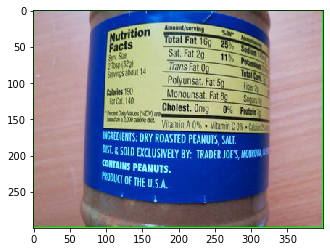

----------3----------
_____ Original _____


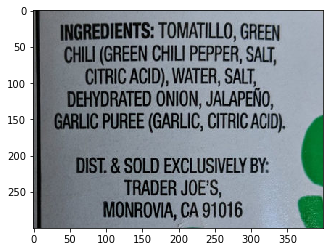

_______ Text _______
[' ', 'INGREDIENTS:', 'TOMATILLO,', 'GREEN', 'CHILI', '(GREEN', 'CHILI', 'PEPPER,', 'SALT,', 'CITRIC', 'ACID),', 'WATER,', 'SALT,', 'DEHYDRATED', 'ONION,', 'JALAPENO,', 'GARLIC', 'PUREE', '(GARLIC,', 'CITRIC', 'ACID).', '(', 'DIST.', '&', 'SOLD', 'EXCLUSIVELY', 'BY:', 'TRADER', "JOE'S,", 'MONROVIA,', 'CA', '91016']
____ Recognized ____


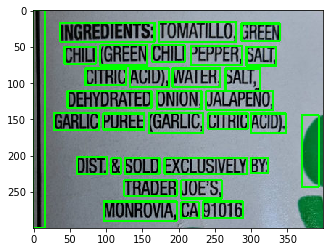

----------4----------
_____ Original _____


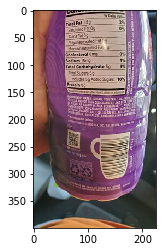

_______ Text _______
[' ']
____ Recognized ____


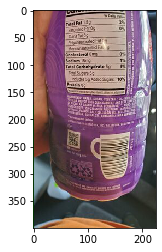

----------5----------
_____ Original _____


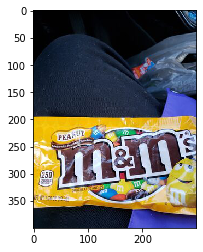

_______ Text _______
[' ']
____ Recognized ____


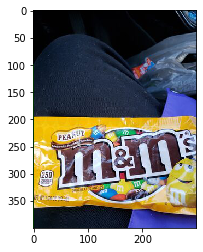

----------6----------
_____ Original _____


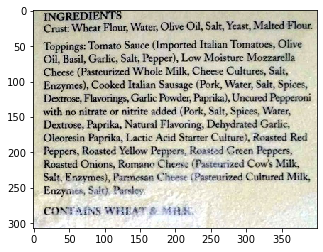

_______ Text _______
['INGREDIENTS', 'Crust:', 'Wheat', 'Flour,', 'Water,', 'Olive', 'Oil,', 'Salt,', 'Yeast,', 'Malted', 'Flour.', '‘Toppings:', 'Tomato', 'Sauce', '(Imported', 'Italian', 'Tomatoes,', 'Olive', 'Oil,', 'Basil,', 'Garlic,', 'Salt,', 'Pepper),', 'Low', 'Moisture', 'Mozzarella', 'Cheese', '(Pasteurized', 'Whole', 'Milk,', 'Cheese', 'Cultures,', 'Salt,', 'Enzymes),', 'Cooked', 'Italian', 'Sausage', '(Pork,', 'Water,', 'Salt,', 'Spices,', 'Dextrose,', 'Flavorings,', 'Garlic', 'Powder,', 'Paprika),', 'Uncured', 'Pepperoni', 'with', 'no', 'nitrate', 'or', 'nitrite', 'added', '(Pork,', 'Salt,', 'Spices,', 'Water,', 'Dextrose,', 'Paprika,', 'Natural', 'Flavoring,', 'Dehydrated', 'Garlic,', 'Oleoresin', 'Paprika,', 'Lactic', 'Acid', 'Starter', 'Culture),', 'Roasted', 'Red', 'Peppers,', 'Roasted', 'Yellow', 'Pepyrers,', 'Roasted', 'Green', 'Peppers,', 'Roasted', 'Onions,', 'Romano', 'Cheess', '(Pasteusized', "Cow's", 'Milk,', 'Salt,', 'Enzymes),', 'Parmesan', 'Cheese', '(Pasteuri

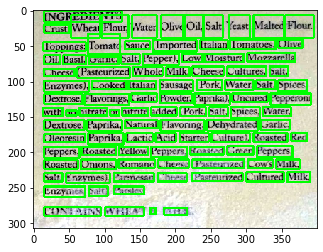

----------7----------
_____ Original _____


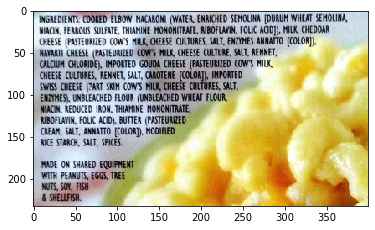

_______ Text _______
['|WGREDIENTS:', 'COOKED', 'ELBOW', 'MACARONI', '(WATER,', 'ENRICHED', 'SEMOLINA', '[DURUM', 'WHEAT', 'SEMOLINA,', '[IACN,', 'FERROUS', 'SULFATE,', 'THIAMINE', 'MONONITRAT,', 'IBOFLAIN,', 'FOLIC', 'AIO),', 'MILK,', 'CHEDDAR', 'GEESE', '(PASTEURIZED', 'COWS', 'MHESECUTUES,', 'AT', 'ERIE', 'ANAT', '(COLOR.', '|HAVARTL', 'CHEESE', '(PASTEURIZED', "COW'S", 'MILK,', 'CHEESE', 'CULTURE,', 'SALT,', 'RENNET,', '‘CALCIUM', 'CHLORIDE),', 'IMPORTED', 'GOUDA', 'CHEESE', '(PASTEURIZED', "COW'S", 'HILK', 'CHESE', 'CULTURE,', 'REMIT,', 'SA,', 'nPoeD', '‘SWISS', 'CHEESE', '(PART', 'SKIM', "COW'S", 'SALT,', 'ENTYMES),', 'UNBLEACHED', 'FLOUR', '(UNBLEACHED', 'WHEAT', 'FLOUR,', 'IMACIN,', 'REDUCED', 'IRON,', 'THIAMINE', 'MONONITRATE,', 'ROFL,', 'FOUC', 'ACD,', 'UTER', '(PATENTED', '{QE', 'SA', 'AMMA', '(00K,', 'ODED', '%', 'NE', 'STANCES.', 'ey', 'O98']
____ Recognized ____


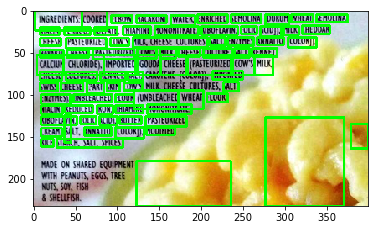

----------8----------
_____ Original _____


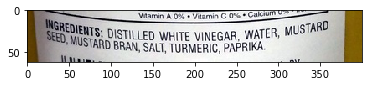

_______ Text _______
['    ', '  ', 'yharsn', 'A', '0?', 'RTS:', '©', 'DISTILLED', 'whiTe', 'vineGaR,', 'WATER,', 'MUSTARD', 'SMUSTARD', 'BRAN,', 'SALT,', 'TURMERIC,', 'PAPRIKA.', ' ', ' ']
____ Recognized ____


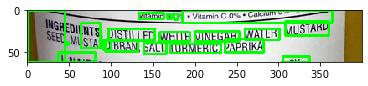

----------9----------
_____ Original _____


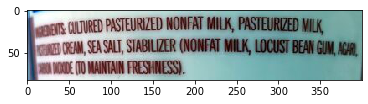

_______ Text _______
['‘sr', 'ONTURED', 'PASTEURIZED', 'NONFAT', 'MILK,', 'PASTEURIZED', 'MILK,', '‘oo', 'ASAT,', 'STABILZER(NONFAT', 'MILK,', 'LOCUST', 'BEA', 'iM', 'ge', '‘2000010', 'WANTAIN', 'FRESHNESS).']
____ Recognized ____


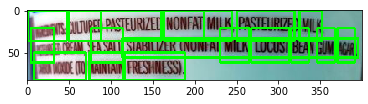

--- 20.438558101654053 seconds ---


In [9]:
# words in the box
texts = []

# position on the page (in pixels)
boxes = []

for i in range(10):
    img = imgs[i].copy()
    print("----------"+str(i)+"----------")
    print("_____ Original _____")
    plt.imshow(img)
    plt.show()
    word_boxes = tool.image_to_string(images[i], lang=lang, builder=pyocr.builders.WordBoxBuilder())
    text = [box.content for box in word_boxes]
    print("_______ Text _______")
    print(text)
    texts.append(text)
    box = [box.position for box in word_boxes]
    h, w, _ = img.shape
    for b in box:
        cv2.rectangle(img, ((int(b[0][0]), int(b[0][1]))), ((int(b[1][0]), int(b[1][1]))), (0, 255, 0), 2)
    print("____ Recognized ____")
    plt.imshow(img)
    plt.show()
    boxes.append(box)
    
print("--- %s seconds ---" % (time.time() - start_time))

## Evaluate OCR results...

In [10]:
ocr_ingredients = []

for i in range(10):
    ocr_ingredient = [s.translate(str.maketrans('', '', string.punctuation)).lower() for s in texts[i]]
    ocr_ingredients.append(ocr_ingredient)

In [11]:
ingredients = []

for i in range(10):
    ingredient = [s.translate(str.maketrans('', '', string.punctuation)).lower() for s in data.ingredients_text[i].split()]
    ingredients.append(ingredient)

In [12]:
# number of actual ingredients in predictions
for i in range(10):
    print(sum([ing in ocr_ingredients[i] for ing in ingredients[i]]))

0
0
0
19
0
0
94
56
10
10


## Find allergens example...

In [13]:
# example allergens
allergens = ["nitrate", "nitrite", "cheese"]

In [14]:
# example ingredient label
box = boxes[6]
img = imgs[6].copy()

data.product_name[6]

'Pizza Parlanno'

In [15]:
# index of allergens in label
alg_loc = [ing in allergens for ing in ocr_ingredients[6]]

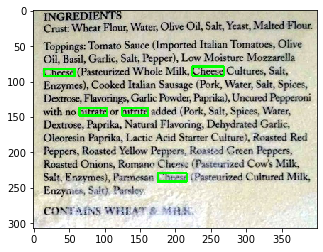

In [16]:
# plot with allegens marked on label
h, w, _ = img.shape
for i in np.array(range(len(box)))[np.array(alg_loc)]:
    b = box[i]
    cv2.rectangle(img, ((int(b[0][0]), int(b[0][1]))), ((int(b[1][0]), int(b[1][1]))), (0, 255, 0), 2)
plt.imshow(img)
plt.show()